In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np

In [19]:
df = pd.read_csv(r'C:\Users\User\Downloads\annual-freshwater-withdrawals.csv')
df


,Entity,Code,Year,"Annual freshwater withdrawals, total (billion cubic meters)"
0,Afghanistan,AFG,1975,1.070000e+10
1,Afghanistan,AFG,1976,1.198426e+10
2,Afghanistan,AFG,1977,1.326852e+10
3,Afghanistan,AFG,1978,1.455278e+10
4,Afghanistan,AFG,1979,1.583703e+10
...,...,...,...,...
6017,Zimbabwe,ZWE,2016,3.402000e+09
6018,Zimbabwe,ZWE,2017,3.339000e+09
6019,Zimbabwe,ZWE,2018,3.771382e+09
6020,Zimbabwe,ZWE,2019,3.771382e+09


In [21]:
df1 = pd.read_csv(r"C:\Users\User\Downloads\global-freshwater-use-over-the-long-run.csv")

In [23]:
df1

,Entity,Code,Year,Freshwater use
0,BRICS,NaN,1901,301174824608
1,BRICS,NaN,1902,313252195793
2,BRICS,NaN,1903,283825062307
3,BRICS,NaN,1904,315007897422
4,BRICS,NaN,1905,325405817427
...,...,...,...,...
436,World,OWID_WRL,2007,4003664798444
437,World,OWID_WRL,2008,3948326264862
438,World,OWID_WRL,2009,4072946984929
439,World,OWID_WRL,2010,3871886184482


In [25]:
df2 = pd.read_csv(r"C:\Users\User\Downloads\washdash-download.csv")


In [27]:
df2

,Type,Region,Residence / Facility Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Environmental cleaning,2023,100.00000,3.166721e+07,Insufficient data
1,sdg,Australia and New Zealand,urban,Environmental cleaning,2023,100.00000,2.744843e+07,Insufficient data
2,sdg,Australia and New Zealand,rural,Environmental cleaning,2023,100.00000,4.218784e+06,Insufficient data
3,sdg,Australia and New Zealand,hospital,Environmental cleaning,2023,100.00000,3.166721e+07,Insufficient data
4,sdg,Australia and New Zealand,non_hospital,Environmental cleaning,2023,100.00000,3.166721e+07,Insufficient data
...,...,...,...,...,...,...,...,...
457,sdg,Sub-Saharan Africa,rural,Health care waste,2023,6.38077,4.331409e+07,No service
458,sdg,Sub-Saharan Africa,hospital,Health care waste,2023,7.89464,9.444162e+07,No service
459,sdg,Sub-Saharan Africa,non_hospital,Health care waste,2023,7.57084,9.056807e+07,No service
460,sdg,Sub-Saharan Africa,government,Health care waste,2023,6.63424,7.936385e+07,No service


In [37]:
df3 = pd.read_csv(r"C:/Users/User/Downloads/water-and-sanitation (1).csv")

In [53]:
df3.head()

,Country,Year,Usage of improved drinking water sources,Usage of basic drinking water services,Usage of limited drinking water services,Usage of unimproved drinking water sources,No usage of drinking water facilities,Usage of safely managed drinking water services,Usage of improved sanitation facilities,Usage of basic sanitation services,...,wat_pip_urban,wat_pip_number_rural,wat_pip_number,wat_pip_number_urban,wat_sm_number_without_rural,wat_sm_number_without,wat_sm_number_without_urban,wat_sm_without_rural,wat_sm_without,wat_sm_without_urban
0,Afghanistan,2000,30.741058,16.348530,3.299203,43.856777,25.402164,11.093327,26.466162,0.0,...,19.063290,0.00,822523.7,822523.7,13978423.0,17375016.0,3396593.0,91.792510,88.906680,78.72142
1,Afghanistan,2001,30.773462,16.368359,3.299883,43.843445,25.383093,11.105221,26.488068,0.0,...,19.063290,0.00,832069.3,832069.3,14066155.0,17502166.0,3436011.2,91.792510,88.894775,78.72142
2,Afghanistan,2002,33.282040,17.667130,3.607177,42.260395,24.457567,12.007733,28.414984,0.0,...,20.168760,0.00,942862.7,942862.7,14833700.0,18478600.0,3644900.2,90.862770,87.992260,77.96800
3,Afghanistan,2003,35.789660,18.965668,3.914072,40.677280,23.533058,12.909922,30.342781,0.0,...,21.274233,142883.52,1219756.8,1076873.1,15813163.0,19721662.0,3908498.0,89.933040,87.090080,77.21458
4,Afghanistan,2004,38.315050,20.275747,4.220617,39.086002,22.598950,13.818684,32.285492,0.0,...,22.379705,299784.84,1485808.1,1186023.4,16246663.0,20298760.0,4052096.0,89.003296,86.181320,76.46115


In [51]:
sumEmpty = df.isnull().sum()
sumEmpty
total_missing = df.isnull().sum().sum()
total_missing

91

In [43]:
df3 = df3 .fillna(0)
df3 

,Country,Year,Usage of improved drinking water sources,Usage of basic drinking water services,Usage of limited drinking water services,Usage of unimproved drinking water sources,No usage of drinking water facilities,Usage of safely managed drinking water services,Usage of improved sanitation facilities,Usage of basic sanitation services,...,wat_pip_urban,wat_pip_number_rural,wat_pip_number,wat_pip_number_urban,wat_sm_number_without_rural,wat_sm_number_without,wat_sm_number_without_urban,wat_sm_without_rural,wat_sm_without,wat_sm_without_urban
0,Afghanistan,2000,30.741058,16.348530,3.299203,43.856777,25.402164,11.093327,26.466162,0.000000,...,19.063290,0.00,822523.7,822523.7,13978423.0,17375016.0,3396593.0,91.792510,88.906680,78.721420
1,Afghanistan,2001,30.773462,16.368359,3.299883,43.843445,25.383093,11.105221,26.488068,0.000000,...,19.063290,0.00,832069.3,832069.3,14066155.0,17502166.0,3436011.2,91.792510,88.894775,78.721420
2,Afghanistan,2002,33.282040,17.667130,3.607177,42.260395,24.457567,12.007733,28.414984,0.000000,...,20.168760,0.00,942862.7,942862.7,14833700.0,18478600.0,3644900.2,90.862770,87.992260,77.968000
3,Afghanistan,2003,35.789660,18.965668,3.914072,40.677280,23.533058,12.909922,30.342781,0.000000,...,21.274233,142883.52,1219756.8,1076873.1,15813163.0,19721662.0,3908498.0,89.933040,87.090080,77.214580
4,Afghanistan,2004,38.315050,20.275747,4.220617,39.086002,22.598950,13.818684,32.285492,0.000000,...,22.379705,299784.84,1485808.1,1186023.4,16246663.0,20298760.0,4052096.0,89.003296,86.181320,76.461150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,Zimbabwe,2018,77.055710,36.730835,13.516939,16.144768,6.799519,26.807938,65.209350,2.812894,...,69.793144,940498.90,4324181.0,3383681.8,8844362.0,11017003.0,2172641.5,86.675220,73.192060,44.813755
5733,Zimbabwe,2019,76.955050,36.410976,13.860095,16.214552,6.830398,26.683977,65.310930,2.812854,...,68.288100,936218.10,4313556.0,3377337.8,9046099.0,11257389.0,2211289.0,86.907440,73.316025,44.711174
5734,Zimbabwe,2020,76.864000,36.092610,14.197539,16.277859,6.858147,26.573847,65.427090,2.811130,...,66.783050,931350.40,4305373.5,3374022.8,9251912.0,11505634.0,2253720.2,87.138725,73.426155,44.608570
5735,Zimbabwe,2021,76.782080,35.775803,14.529284,16.334637,6.883281,26.476995,65.557000,2.807513,...,65.278010,925650.10,4298165.5,3372515.2,9459569.0,11758919.0,2299349.5,87.369090,73.523000,44.505940


In [95]:


# Select relevant features
features = ['Year', 'Usage of improved drinking water sources', 'Usage of basic drinking water services', 
            'Usage of limited drinking water services', 'Usage of unimproved drinking water sources']
target = 'Usage of safely managed drinking water services'

# Create X and y
X = df3[features]
y = df3[target]



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed. Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)





Data preprocessing completed. Shape of training data: (4589, 5)
Shape of test data: (1148, 5)


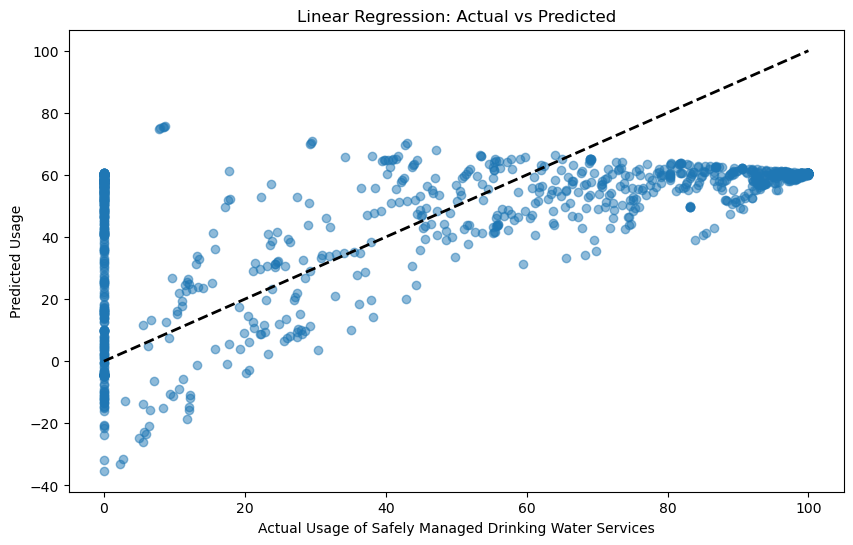

Mean Squared Error: 1146.5194042723442
R-squared: 0.31049704345599716


In [99]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Train a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Usage of Safely Managed Drinking Water Services')
plt.ylabel('Predicted Usage')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

print('Mean Squared Error:', mse)
print('R-squared:', r2)



In [109]:



linear_regressor_cleaned = LinearRegression()
linear_regressor_cleaned.fit(X, y)




LinearRegression()

In [117]:
# Predict on the cleaned test set
y_pred_cleaned = linear_regressor_cleaned.predict(X)

# Evaluate the model
mse_cleaned = mean_squared_error(y, y_pred_cleaned)
r2_cleaned = r2_score(y, y_pred_cleaned)



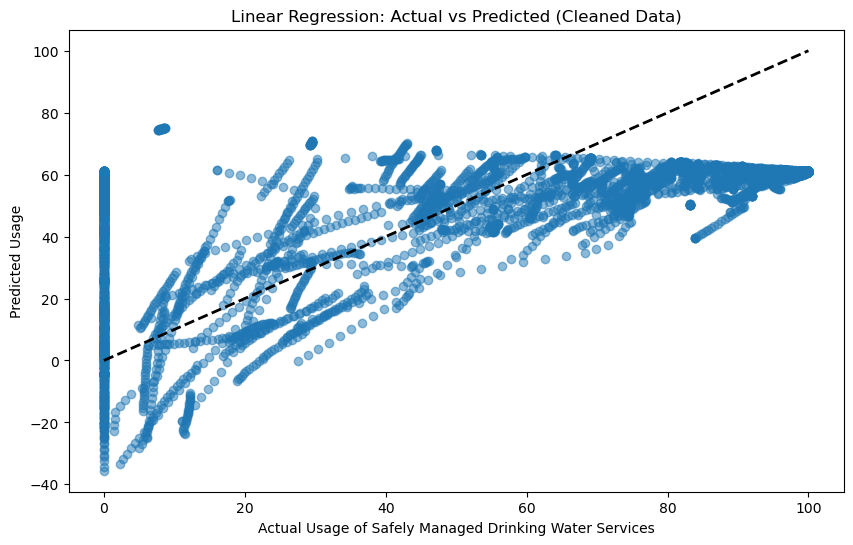

Mean Squared Error (Cleaned): 1157.0730258962926
R-squared (Cleaned): 0.30283444506902724


In [125]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_cleaned, alpha=0.5)
plt.xlabel('Actual Usage of Safely Managed Drinking Water Services')
plt.ylabel('Predicted Usage')
plt.title('Linear Regression: Actual vs Predicted (Cleaned Data)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

print('Mean Squared Error (Cleaned):', mse_cleaned)
print('R-squared (Cleaned):', r2_cleaned)